In [186]:
#Declare the libraries needed
import tweepy 
import pandas as pd
import sys
import csv
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
from PIL import Image
import pandas_profiling
import twitter
#api = twitter.Api(consumer_key='consumer_key',consumer_secret='consumer_secret',
#access_token_key='access_token',access_token_secret='access_token_secret')
api = twitter.Api(consumer_key='YLSBZeZ5ytLD8u1ZLgmWs7jeU',
                      consumer_secret='zVO69K86YtEkODZOiAe53p0F1Qkogh4BrPAIEw8vfjRuk4ptdO',
                      access_token_key='1117266834653241346-3VBwsLFoSsHu4Rm7bVlERRmDun4UED',
                      access_token_secret='8QboAOWWEVWYgyP8Dh16CoDjakXpp1FkcU4AKY1MbuGgP')
  
# Function to extract tweets 
def get_tweets(username): 
          
        # Authorization to consumer key and consumer secret 
        auth = tweepy.OAuthHandler('YLSBZeZ5ytLD8u1ZLgmWs7jeU', 'zVO69K86YtEkODZOiAe53p0F1Qkogh4BrPAIEw8vfjRuk4ptdO') 
  
        # Access to user's access key and access secret 
        auth.set_access_token('1117266834653241346-3VBwsLFoSsHu4Rm7bVlERRmDun4UED', '8QboAOWWEVWYgyP8Dh16CoDjakXpp1FkcU4AKY1MbuGgP') 
  
        # Calling api 
        api = tweepy.API(auth) 
        #set count to however many tweets you want - max count is 3200 and this doesn't have any effect if it is more than 3200
#        number_of_tweets = 5000
       
        tfile = []
        for tweet in tweepy.Cursor(api.user_timeline, screen_name = username).items():
            tfile.append([len(tweet.text), username, tweet.id_str,tweet.source, tweet.created_at,tweet.retweet_count,tweet.favorite_count, tweet.text.encode("utf-8")])

	#write to a new csv file from the array of tweets
        outfile = username + "_tweets_V14.csv"
        print ("writing to " + outfile)
        with open(outfile, 'w+') as file:
            writer = csv.writer(file, delimiter=',')
            writer.writerow(['len','User_Name', 'Tweet_ID', 'Source', 'Created_date','Retweet_count','Favorite_count','Text',])
            writer.writerows(tfile)
# user name
get_tweets("@jokowi")  

writing to @jokowi_tweets_V14.csv


In [2]:
#Read the file and also assign it to dataframe
import tweepy 
import pandas as pd
import sys
import csv
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
from PIL import Image
import pandas_profiling
import twitter
import numpy as np
import nltk
import warnings 

import string

bg= pd.read_csv("@jokowi_tweets_V14.csv",encoding='utf-8') 
bg.head()


,len,User_Name,Tweet_ID,Source,Created_date,Retweet_count,Favorite_count,Text
0,139,@jokowi,1161947530160046080,Twitter for Android,2019-08-15 10:27:33,698,5942,b'Sebanyak 29 anak bangsa hari ini menerima an...
1,140,@jokowi,1161636750181064705,Twitter for Android,2019-08-14 13:52:38,2823,19024,b'Selamat ulang tahun ke-58 Gerakan Pramuka.\n...
2,140,@jokowi,1161626192627154947,Twitter for Android,2019-08-14 13:10:40,1368,8809,b'Beginilah pelataran istana pada hari-hari me...
3,140,@jokowi,1161590403780370433,Twitter for Android,2019-08-14 10:48:28,439,4095,b'Menerima delegasi dan peserta WorldSkills 20...
4,139,@jokowi,1161516679278542848,Twitter for Android,2019-08-14 05:55:30,1581,10571,b'Ini pembangunan Bendungan Ciawi di Bogor yan...


In [3]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

In [4]:
# remove twitter handles (@user)
bg['tidy_tweet'] = np.vectorize(remove_pattern)(bg['Text'], "@[\w]*")
bg['tidy_tweet'] = bg['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
bg['tidy_tweet'] = bg['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
bg.head()


,len,User_Name,Tweet_ID,Source,Created_date,Retweet_count,Favorite_count,Text,tidy_tweet
0,139,@jokowi,1161947530160046080,Twitter for Android,2019-08-15 10:27:33,698,5942,b'Sebanyak 29 anak bangsa hari ini menerima an...,Sebanyak anak bangsa hari menerima anugerah ta...
1,140,@jokowi,1161636750181064705,Twitter for Android,2019-08-14 13:52:38,2823,19024,b'Selamat ulang tahun ke-58 Gerakan Pramuka.\n...,Selamat ulang tahun Gerakan Pramuka nTerima ka...
2,140,@jokowi,1161626192627154947,Twitter for Android,2019-08-14 13:10:40,1368,8809,b'Beginilah pelataran istana pada hari-hari me...,Beginilah pelataran istana pada hari hari menj...
3,140,@jokowi,1161590403780370433,Twitter for Android,2019-08-14 10:48:28,439,4095,b'Menerima delegasi dan peserta WorldSkills 20...,Menerima delegasi peserta WorldSkills dari Ind...
4,139,@jokowi,1161516679278542848,Twitter for Android,2019-08-14 05:55:30,1581,10571,b'Ini pembangunan Bendungan Ciawi di Bogor yan...,pembangunan Bendungan Ciawi Bogor yang diranca...


In [5]:
tokenized_tweet = bg['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Sebanyak, anak, bangsa, hari, menerima, anuge...
1    [Selamat, ulang, tahun, Gerakan, Pramuka, nTer...
2    [Beginilah, pelataran, istana, pada, hari, har...
3    [Menerima, delegasi, peserta, WorldSkills, dar...
4    [pembangunan, Bendungan, Ciawi, Bogor, yang, d...
Name: tidy_tweet, dtype: object

In [6]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [sebanyak, anak, bangsa, hari, menerima, anuge...
1    [selamat, ulang, tahun, gerakan, pramuka, nter...
2    [beginilah, pelataran, istana, pada, hari, har...
3    [menerima, delegasi, peserta, worldskil, dari,...
4    [pembangunan, bendungan, ciawi, bogor, yang, d...
Name: tidy_tweet, dtype: object

In [7]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

bg['tidy_tweet'] = tokenized_tweet
tknz = tokenized_tweet

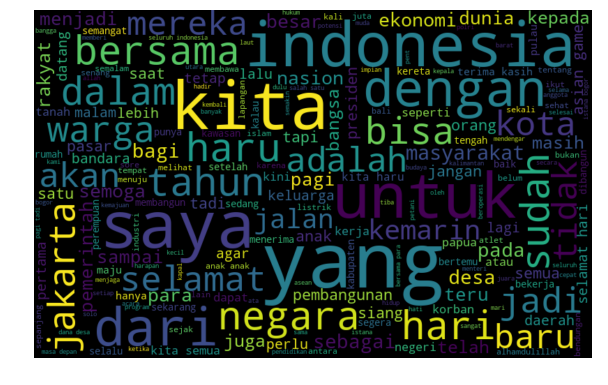

In [8]:
all_words = ' '.join([text for text in bg['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

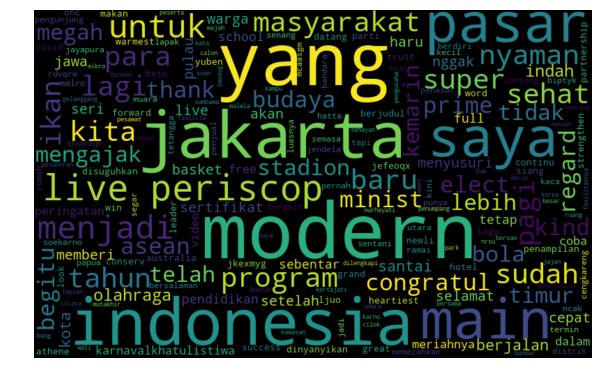

In [94]:
normal_words =' '.join([text for text in bg['tidy_tweet'][bg['SA'] > 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

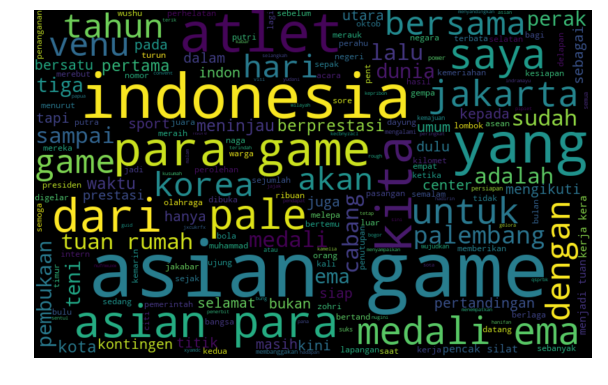

In [96]:
negative_words = ' '.join([text for text in bg['tidy_tweet'][bg['SA'] < 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

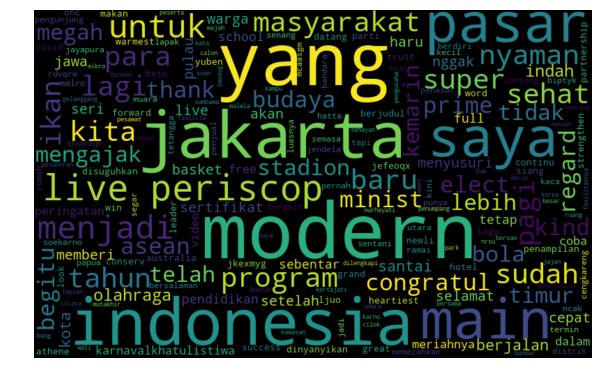

In [97]:
netral_words =' '.join([text for text in bg['tidy_tweet'][bg['SA'] == 0]])
#print(normal_words)
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [12]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(bg['tidy_tweet'][bg['Retweet_count'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(bg['tidy_tweet'][bg['Retweet_count'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

Text(0, 0.5, 'Number of Tweets')

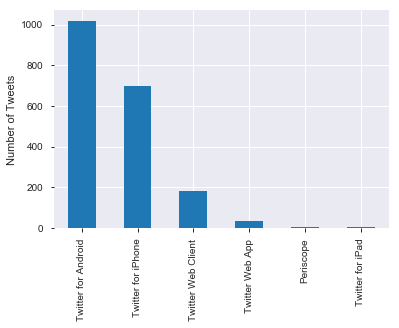

In [13]:
bg['Source'].value_counts().plot(kind="bar")
plt.ylabel("Number of Tweets")

Text(0, 0.5, 'Number of Tweets')

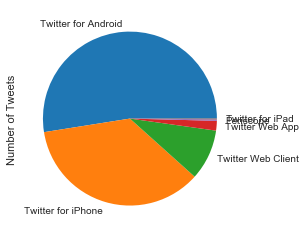

In [14]:
bg['Source'].value_counts().plot(kind="pie")
plt.ylabel("Number of Tweets")

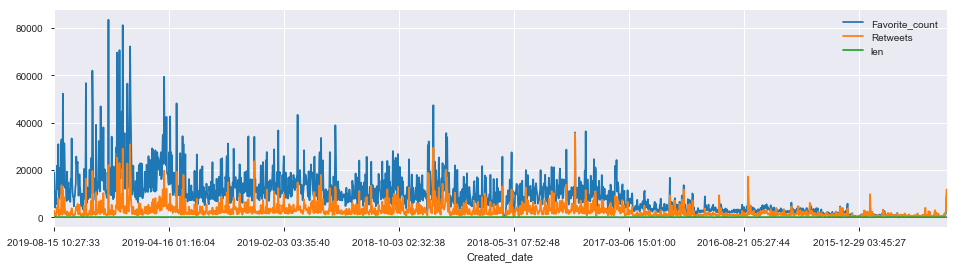

In [15]:
plt = pd.Series(data=bg['Retweet_count'].values, index=bg['Created_date'])
pltd = pd.Series(data=bg['Favorite_count'].values, index=bg['Created_date'])
tret = pd.Series(data=bg['len'].values, index=bg['Created_date'])
#tret.plot(figsize=(16,4), color='r');

pltd.plot(figsize=(16,4), label="Favorite_count", legend=True)
plt.plot(figsize=(16,4), label="Retweets", legend=True);
tret.plot(figsize=(16,4), label="len", legend=True);

In [85]:
from textblob import TextBlob
import re
def analize_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
bg['SA'] = np.array([analize_sentiment(tweet) for tweet in bg['tidy_tweet']])

# We display the updated dataframe with the new column:
display(bg.head(100))

,len,User_Name,Tweet_ID,Source,Created_date,Retweet_count,Favorite_count,Text,tidy_tweet,SA
0,139,@jokowi,1161947530160046080,Twitter for Android,2019-08-15 10:27:33,698,5942,b'Sebanyak 29 anak bangsa hari ini menerima an...,sebanyak anak bangsa hari menerima anugerah ta...,0
1,140,@jokowi,1161636750181064705,Twitter for Android,2019-08-14 13:52:38,2823,19024,b'Selamat ulang tahun ke-58 Gerakan Pramuka.\n...,selamat ulang tahun gerakan pramuka nterima ka...,0
2,140,@jokowi,1161626192627154947,Twitter for Android,2019-08-14 13:10:40,1368,8809,b'Beginilah pelataran istana pada hari-hari me...,beginilah pelataran istana pada hari hari menj...,0
3,140,@jokowi,1161590403780370433,Twitter for Android,2019-08-14 10:48:28,439,4095,b'Menerima delegasi dan peserta WorldSkills 20...,menerima delegasi peserta worldskil dari indon...,0
4,139,@jokowi,1161516679278542848,Twitter for Android,2019-08-14 05:55:30,1581,10571,b'Ini pembangunan Bendungan Ciawi di Bogor yan...,pembangunan bendungan ciawi bogor yang diranca...,0
5,140,@jokowi,1161462903788036097,Twitter for Android,2019-08-14 02:21:49,757,5538,"b'World Expo digelar di Dubai, Oktober 2020, d...",world expo digelar dubai oktob diikuti negara ...,0
6,138,@jokowi,1161237380969271302,Twitter for Android,2019-08-13 11:25:41,1754,11981,b'Pemerintah secara bertahap menyelesaikan pem...,pemerintah secara bertahap menyelesaikan pemba...,0
7,140,@jokowi,1160496775389577217,Twitter for Android,2019-08-11 10:22:46,4367,21809,b'Jangan bilang jadi menteri tak bisa ikut lom...,jangan bilang jadi menteri bisa ikut lomba mak...,0
8,139,@jokowi,1160430142256058369,Twitter for Android,2019-08-11 05:58:00,2125,17237,b'Salat Iduladha bersama masyarakat di antara ...,salat iduladha bersama masyarakat antara rinda...,0
9,139,@jokowi,1160359339003011073,Twitter for Android,2019-08-11 01:16:39,2109,12031,b'Dengan berkurban kita memberikan yang terbai...,dengan berkurban kita memberikan yang terbaik ...,0


In [17]:
pos_tweets = [ tweet for index, tweet in enumerate(bg['tidy_tweet']) if bg['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(bg['tidy_tweet']) if bg['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(bg['tidy_tweet']) if bg['SA'][index] < 0]

In [35]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(bg['tidy_tweet'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(bg['tidy_tweet'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(bg['tidy_tweet'])))
pda = format(len(pos_tweets)*100/len(bg['tidy_tweet']))
pdb = format(len(neu_tweets)*100/len(bg['tidy_tweet']))
pdc = format(len(neg_tweets)*100/len(bg['tidy_tweet']))


Percentage of positive tweets: 2.0607934054611023%
Percentage of neutral tweets: 93.81761978361669%
Percentage de negative tweets: 4.121586810922205%


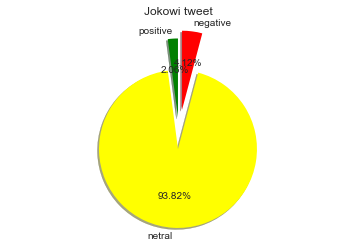

In [49]:
import matplotlib.pyplot as plt

labels= ['positive', 'netral', 'negative']

colors=['green', 'yellow', 'red', 'orange']

sizes= [pda, pdb, pdc]

plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.2, 0.2, 0.3), autopct='%1.2f%%')

plt.title('Jokowi tweet')

plt.axis('equal')

plt.show()